# Análise de Datas e Dados Categóricos 🗓️🏷️

## 1. Introdução

Neste notebook, o foco é demonstrar como manipular e extrair insights de dois tipos de dados muito comuns em análise de dados: **datas** e **categorias**. A correta preparação desses dados é fundamental para identificar tendências temporais, padrões sazonais e distribuições de frequência, que são a base de muitos projetos de ciência de dados.

---
## 2. Importação de Bibliotecas

Importamos as bibliotecas essenciais para a manipulação e visualização de dados.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

---
## 3. Criação e Visualização Inicial dos Dados  
Para este projeto, vamos simular um conjunto de dados de pedidos de clientes, que inclui informações de data, produto e status.

In [2]:
# Criando um DataFrame de exemplo
data = {
    'ID_Pedido': range(1, 21),
    'Data_Pedido': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-06-30'), 20)),
    'Categoria_Produto': np.random.choice(['Eletrônicos', 'Vestuário', 'Esportes', 'Alimentos', 'Livros'], 20),
    'Status_Entrega': np.random.choice(['Entregue', 'Em Trânsito', 'Atrasado'], 20),
    'Receita': np.random.uniform(50, 500, 20).round(2)
}

df_pedidos = pd.DataFrame(data)

print("Primeiras 5 linhas do DataFrame:")
display(df_pedidos.head())

print("\nTipos de dados originais:")
df_pedidos.info()

Primeiras 5 linhas do DataFrame:


,ID_Pedido,Data_Pedido,Categoria_Produto,Status_Entrega,Receita
0,1,2024-04-14,Eletrônicos,Atrasado,266.13
1,2,2024-03-23,Vestuário,Atrasado,405.19
2,3,2024-04-25,Vestuário,Entregue,229.68
3,4,2024-04-14,Livros,Em Trânsito,261.23
4,5,2024-04-21,Esportes,Entregue,469.60



Tipos de dados originais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Pedido          20 non-null     int64         
 1   Data_Pedido        20 non-null     datetime64[ns]
 2   Categoria_Produto  20 non-null     object        
 3   Status_Entrega     20 non-null     object        
 4   Receita            20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 932.0+ bytes


---
## 4. Trabalhando com Datas (Time Series) 🗓️
O pandas tem ferramentas poderosas para trabalhar com datas. Vamos converter a coluna **'Data_Pedido'** para o tipo `datetime` e extrair informações úteis.

DataFrame com novas colunas de data:


,ID_Pedido,Data_Pedido,Categoria_Produto,Status_Entrega,Receita,Ano,Mes,Dia_da_Semana
0,1,2024-04-14,Eletrônicos,Atrasado,266.13,2024,4,Sunday
1,2,2024-03-23,Vestuário,Atrasado,405.19,2024,3,Saturday
2,3,2024-04-25,Vestuário,Entregue,229.68,2024,4,Thursday
3,4,2024-04-14,Livros,Em Trânsito,261.23,2024,4,Sunday
4,5,2024-04-21,Esportes,Entregue,469.60,2024,4,Sunday



Receita total por mês:
Mes
1     661.55
2     394.42
3     625.36
4    1421.30
5    1429.65
6     916.82
Name: Receita, dtype: float64


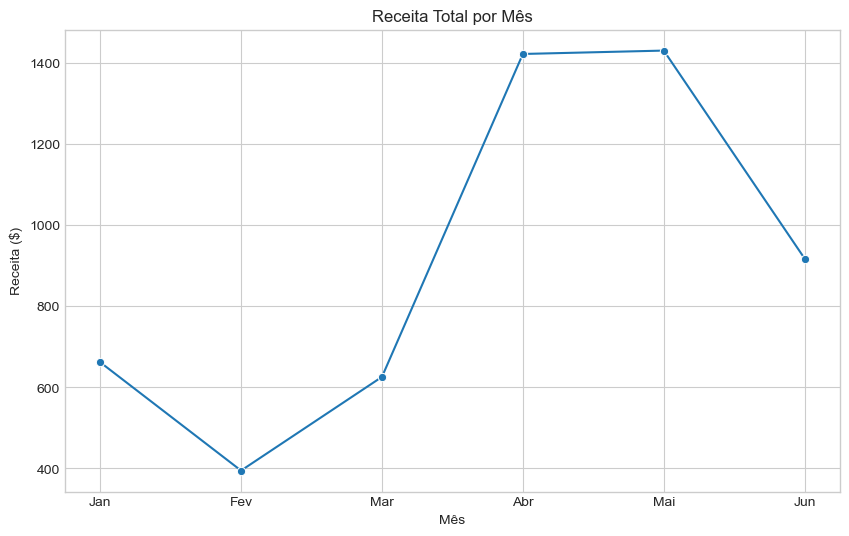

In [3]:
# A coluna 'Data_Pedido' já foi criada como datetime, mas em um cenário real, você faria a conversão assim:
# df_pedidos['Data_Pedido'] = pd.to_datetime(df_pedidos['Data_Pedido'])

# Extraindo componentes de data (Feature Engineering)
df_pedidos['Ano'] = df_pedidos['Data_Pedido'].dt.year
df_pedidos['Mes'] = df_pedidos['Data_Pedido'].dt.month
df_pedidos['Dia_da_Semana'] = df_pedidos['Data_Pedido'].dt.day_name()

print("DataFrame com novas colunas de data:")
display(df_pedidos.head())

# Análise: Total de pedidos por mês
pedidos_por_mes = df_pedidos.groupby('Mes')['Receita'].sum()
print("\nReceita total por mês:")
print(pedidos_por_mes)

# Visualização da Receita Mensal
plt.figure(figsize=(10, 6))
sns.lineplot(x=pedidos_por_mes.index, y=pedidos_por_mes.values, marker='o')
plt.title('Receita Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita ($)')
plt.xticks(ticks=range(1, 7), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'])
plt.show()

---
## 5. Trabalhando com Dados Categóricos 🏷️  
Dados categóricos, como **'Categoria_Produto'**, podem ser convertidos para um tipo de dado específico no pandas para otimizar memória e permitir análises específicas.

Tipos de dados após a conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Pedido          20 non-null     int64         
 1   Data_Pedido        20 non-null     datetime64[ns]
 2   Categoria_Produto  20 non-null     category      
 3   Status_Entrega     20 non-null     category      
 4   Receita            20 non-null     float64       
 5   Ano                20 non-null     int32         
 6   Mes                20 non-null     int32         
 7   Dia_da_Semana      20 non-null     object        
dtypes: category(2), datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 1.3+ KB

Contagem de pedidos por categoria:
Categoria_Produto
Vestuário      6
Esportes       4
Livros         4
Alimentos      3
Eletrônicos    3
Name: count, dtype: int64


C:\Users\marlo\AppData\Local\Temp\ipykernel_12016\860919663.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_categorias.index, y=contagem_categorias.values, palette='coolwarm')


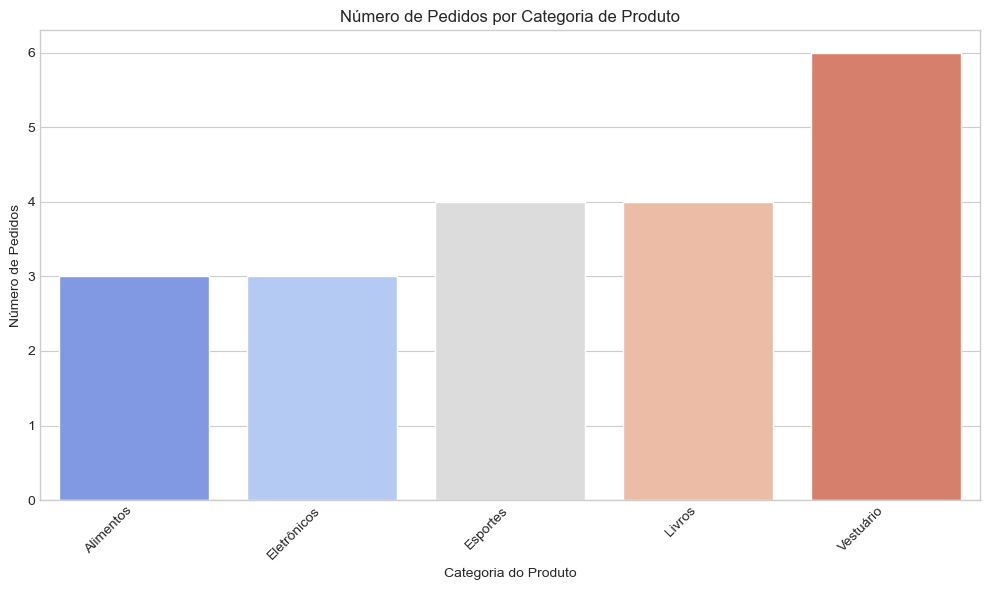


Contagem de pedidos por status de entrega:
Status_Entrega
Em Trânsito    8
Atrasado       6
Entregue       6
Name: count, dtype: int64


In [4]:
# Convertendo a coluna 'Categoria_Produto' para o tipo 'category'
df_pedidos['Categoria_Produto'] = df_pedidos['Categoria_Produto'].astype('category')
df_pedidos['Status_Entrega'] = df_pedidos['Status_Entrega'].astype('category')

print("Tipos de dados após a conversão:")
df_pedidos.info()

# Análise: Contagem de pedidos por categoria de produto
contagem_categorias = df_pedidos['Categoria_Produto'].value_counts()
print("\nContagem de pedidos por categoria:")
print(contagem_categorias)

# Visualização da contagem de pedidos por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_categorias.index, y=contagem_categorias.values, palette='coolwarm')
plt.title('Número de Pedidos por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análise de Status de Entrega
contagem_status = df_pedidos['Status_Entrega'].value_counts()
print("\nContagem de pedidos por status de entrega:")
print(contagem_status)

---
## 🏁 6. Conclusão
Este notebook demonstrou como a preparação de datas e dados categóricos é um passo essencial na análise de dados. 
- A conversão de colunas de texto para o tipo `datetime` permite **extrair informações temporais** e **visualizar tendências**.  
- A conversão para o tipo `category` otimiza o **uso de memória** e facilita a **análise de frequência** e **visualização de variáveis discretas**.